# Laptop Price Prediction

# IMPORTING ALL REQUIRED LIBRARIES

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

plt.style.use("ggplot")




In [ ]:
#Load a dataset.

In [8]:

df = pd.read_csv("laptop_buy_classification.csv")


(25000, 9)
   Age  Income  Laptop_Price      Region    Brand   Purpose  RAM_GB  \
0   53  136687        132068       Rural     Asus    Gaming       4   
1   66  106256        112748       Rural     Dell  Business       4   
2   43  169009        129702       Metro     Asus    Casual       8   
3   29   28540         73697  Semi-Urban  Samsung      Work       4   
4   57   83480         50903       Rural     Acer      Work       8   

   Storage_GB  Laptop_Buy  
0         256           1  
1        1024           1  
2         256           1  
3         512           1  
4         512           1  


# Basic EDA (Explore the Data)

In [9]:
print(df.head(5))

   Age  Income  Laptop_Price      Region    Brand   Purpose  RAM_GB  \
0   53  136687        132068       Rural     Asus    Gaming       4   
1   66  106256        112748       Rural     Dell  Business       4   
2   43  169009        129702       Metro     Asus    Casual       8   
3   29   28540         73697  Semi-Urban  Samsung      Work       4   
4   57   83480         50903       Rural     Acer      Work       8   

   Storage_GB  Laptop_Buy  
0         256           1  
1        1024           1  
2         256           1  
3         512           1  
4         512           1  


In [10]:
print(df.shape)

(25000, 9)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age           25000 non-null  int64 
 1   Income        25000 non-null  int64 
 2   Laptop_Price  25000 non-null  int64 
 3   Region        25000 non-null  object
 4   Brand         25000 non-null  object
 5   Purpose       25000 non-null  object
 6   RAM_GB        25000 non-null  int64 
 7   Storage_GB    25000 non-null  int64 
 8   Laptop_Buy    25000 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 1.7+ MB


In [12]:
df.describe()

,Age,Income,Laptop_Price,RAM_GB,Storage_GB,Laptop_Buy
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,42.024680,129810.521840,97490.179600,14.916800,480.747520,0.970360
std,15.875195,69385.725637,47802.939913,10.690521,344.217565,0.169595
min,15.000000,10010.000000,15002.000000,4.000000,128.000000,0.000000
25%,28.000000,70250.250000,56207.000000,4.000000,128.000000,1.000000
50%,42.000000,129197.000000,97541.000000,8.000000,256.000000,1.000000
75%,56.000000,190356.250000,139074.000000,16.000000,1024.000000,1.000000
max,69.000000,249990.000000,179988.000000,32.000000,1024.000000,1.000000


In [15]:
df.columns

Index(['Age', 'Income', 'Laptop_Price', 'Region', 'Brand', 'Purpose', 'RAM_GB',
       'Storage_GB', 'Laptop_Buy'],
      dtype='object')

In [17]:
df.dtypes

Age              int64
Income           int64
Laptop_Price     int64
Region          object
Brand           object
Purpose         object
RAM_GB           int64
Storage_GB       int64
Laptop_Buy       int64
dtype: object

# handle missing values.

In [19]:
df.isnull().sum()      #Check how many missing values are present in each column

Age             0
Income          0
Laptop_Price    0
Region          0
Brand           0
Purpose         0
RAM_GB          0
Storage_GB      0
Laptop_Buy      0
dtype: int64

In [23]:
df.duplicated().sum()       # → tells the count of duplicate rows

np.int64(0)

In [24]:
print(df["Laptop_Buy"].value_counts())

Laptop_Buy
1    24259
0      741
Name: count, dtype: int64


# Exploratory Data Analysis (EDA Visuals & Insights)

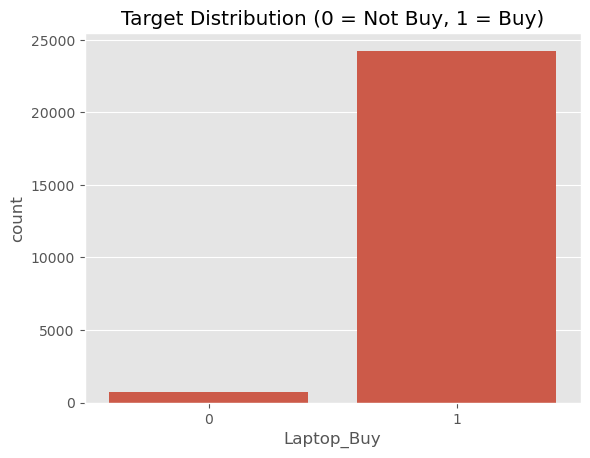

In [28]:

sns.countplot(x=df["Laptop_Buy"])
plt.title("Target Distribution (0 = Not Buy, 1 = Buy)")
plt.show()


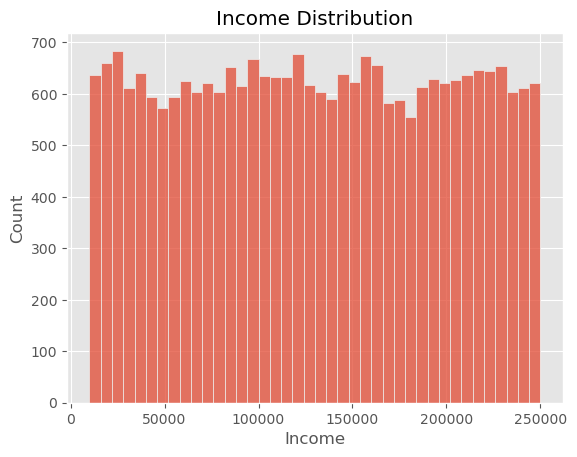

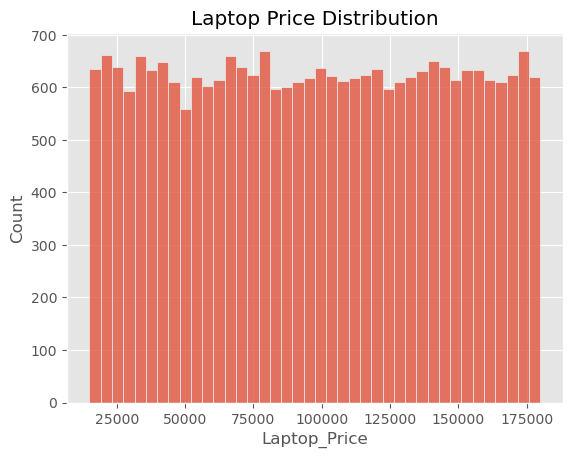

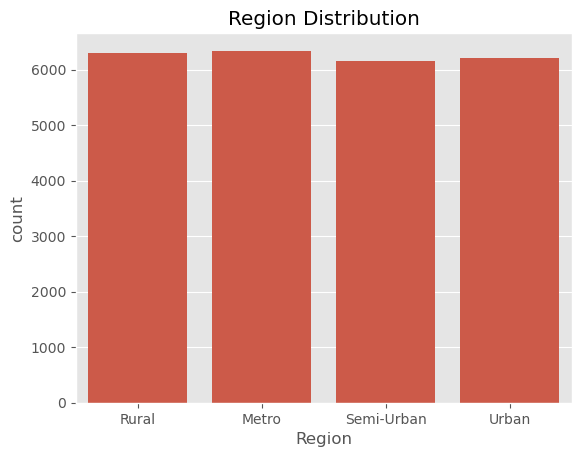

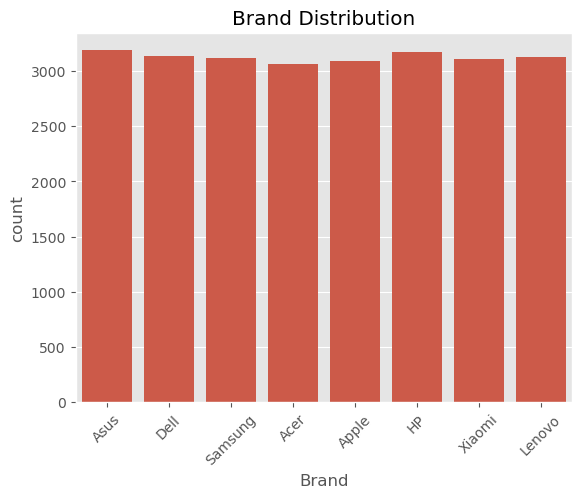

In [30]:
sns.histplot(df["Income"], bins=40)
plt.title("Income Distribution")
plt.show()

sns.histplot(df["Laptop_Price"], bins=40)
plt.title("Laptop Price Distribution")
plt.show()

sns.countplot(x=df["Region"])
plt.title("Region Distribution")
plt.show()

sns.countplot(x=df["Brand"])
plt.title("Brand Distribution")
plt.xticks(rotation=45)
plt.show()


# Define features (X)and target (Y)

In [42]:
target_col = "Laptop_Buy"

feature_cols = [
    "Age",
    "Income",
    "Laptop_Price",
    "Region",
    "Brand",
    "Purpose",
    "RAM_GB",
    "Storage_GB"
]

X = df[feature_cols]
y = df[target_col]


In [43]:
numeric_cols = ["Age", "Income", "Laptop_Price", "RAM_GB", "Storage_GB"]
cat_cols = ["Region", "Brand", "Purpose"]


In [44]:
numeric_cols

['Age', 'Income', 'Laptop_Price', 'RAM_GB', 'Storage_GB']

In [45]:
cat_cols

['Region', 'Brand', 'Purpose']

# Encode Categorical Features 

In [46]:
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)
print("Encoded shape:", X_encoded.shape)
print(X_encoded.head())


Encoded shape: (25000, 19)
   Age  Income  Laptop_Price  RAM_GB  Storage_GB  Region_Rural  \
0   53  136687        132068       4         256          True   
1   66  106256        112748       4        1024          True   
2   43  169009        129702       8         256         False   
3   29   28540         73697       4         512         False   
4   57   83480         50903       8         512          True   

   Region_Semi-Urban  Region_Urban  Brand_Apple  Brand_Asus  Brand_Dell  \
0              False         False        False        True       False   
1              False         False        False       False        True   
2              False         False        False        True       False   
3               True         False        False       False       False   
4              False         False        False       False       False   

   Brand_HP  Brand_Lenovo  Brand_Samsung  Brand_Xiaomi  Purpose_Casual  \
0     False         False          False         Fa

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age           25000 non-null  int64 
 1   Income        25000 non-null  int64 
 2   Laptop_Price  25000 non-null  int64 
 3   Region        25000 non-null  object
 4   Brand         25000 non-null  object
 5   Purpose       25000 non-null  object
 6   RAM_GB        25000 non-null  int64 
 7   Storage_GB    25000 non-null  int64 
 8   Laptop_Buy    25000 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 1.7+ MB


# Train–Test Split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (20000, 19)
Test shape: (5000, 19)


# Feature Scaling

In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [54]:
X_train_scaled

array([[-0.50878196,  0.86469175,  1.48293007, ..., -0.49781153,
        -0.49522972, -0.50304505],
       [ 1.25702281, -1.28134729,  0.82706173, ..., -0.49781153,
        -0.49522972, -0.50304505],
       [ 1.19395835, -0.956687  ,  0.44564604, ..., -0.49781153,
        -0.49522972,  1.98789354],
       ...,
       [ 0.18492706, -0.44448239,  1.22472392, ...,  2.00879236,
        -0.49522972, -0.50304505],
       [ 0.37412042, -1.6582395 , -0.95498574, ..., -0.49781153,
        -0.49522972, -0.50304505],
       [ 1.06782944, -1.29925332, -1.30288257, ..., -0.49781153,
         2.01926492, -0.50304505]])

In [55]:
X_test_scaled

array([[ 0.87863607, -1.58965987, -1.44365758, ..., -0.49781153,
        -0.49522972, -0.50304505],
       [ 0.18492706,  0.04125997, -0.40103482, ...,  2.00879236,
        -0.49522972, -0.50304505],
       [ 1.00476498, -1.68576947, -0.10181465, ..., -0.49781153,
        -0.49522972, -0.50304505],
       ...,
       [ 0.24799151, -1.55618527,  0.4596733 , ..., -0.49781153,
        -0.49522972,  1.98789354],
       [-1.45474879, -0.62618308,  1.38974305, ...,  2.00879236,
        -0.49522972, -0.50304505],
       [ 0.75250716,  0.91983826,  1.08185529, ..., -0.49781153,
        -0.49522972, -0.50304505]])

#Train Multiple Classification Models

#Logistic Regression
#Random Forest
#SVM
#KNN
#Gradient Boosting
#XGBoost

In [58]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(
        eval_metric="logloss",
        use_label_encoder=False
    )
}

In [59]:
accuracy_results = {}

for name, model in models.items():
    print(f"\n==============================")
    print(f"Training: {name}")
    print(f"==============================")

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracy_results[name] = acc

    print(f"Accuracy: {acc:.2f}%")
    print("\nClassification report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion matrix:\n", cm)


Training: Logistic Regression
Accuracy: 98.34%

Classification report:
               precision    recall  f1-score   support

           0       0.77      0.62      0.69       148
           1       0.99      0.99      0.99      4852

    accuracy                           0.98      5000
   macro avg       0.88      0.81      0.84      5000
weighted avg       0.98      0.98      0.98      5000

Confusion matrix:
 [[  92   56]
 [  27 4825]]

Training: Random Forest
Accuracy: 99.66%

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94       148
           1       1.00      1.00      1.00      4852

    accuracy                           1.00      5000
   macro avg       1.00      0.94      0.97      5000
weighted avg       1.00      1.00      1.00      5000

Confusion matrix:
 [[ 131   17]
 [   0 4852]]

Training: SVM
Accuracy: 98.60%

Classification report:
               precision    recall  f1-score   support

  

C:\Users\Swarda\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [11:52:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 99.80%

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       148
           1       1.00      1.00      1.00      4852

    accuracy                           1.00      5000
   macro avg       1.00      0.97      0.98      5000
weighted avg       1.00      1.00      1.00      5000

Confusion matrix:
 [[ 139    9]
 [   1 4851]]


# Compare models

In [62]:
print("\n=== ACCURACY SUMMARY ===")
for name, acc in accuracy_results.items():
    print(f"{name}: {acc:.2f}%")

best_algo = max(accuracy_results, key=accuracy_results.get)
print("\n Best algorithm:", best_algo)
print(f" Best accuracy: {accuracy_results[best_algo]:.2f}%")



=== ACCURACY SUMMARY ===
Logistic Regression: 98.34%
Random Forest: 99.66%
SVM: 98.60%
KNN: 97.82%
Gradient Boosting: 99.82%
XGBoost: 99.80%

 Best algorithm: Gradient Boosting
 Best accuracy: 99.82%


In [ ]:
# Bar chart

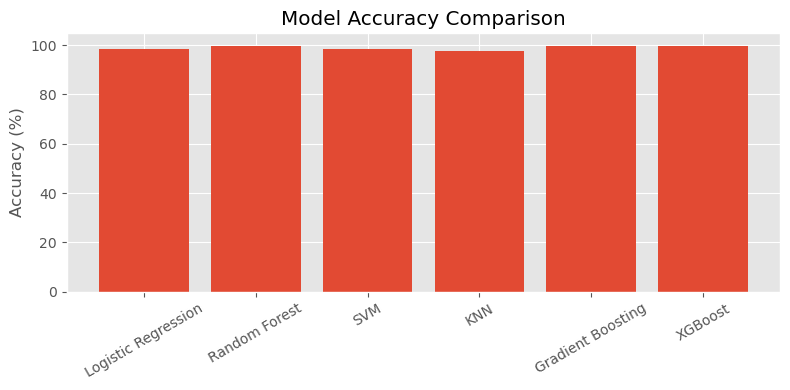

In [63]:
plt.figure(figsize=(8,4))
plt.bar(accuracy_results.keys(), accuracy_results.values())
plt.xticks(rotation=30)
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.tight_layout()
plt.show()


In [67]:
best_model = models[best_algo]

# Take one sample from test set
sample = X_test.iloc[-1]
print(best_model)

GradientBoostingClassifier()


In [69]:
best_model = models[best_model]

sample = X_test.iloc[-1]
sample_scaled = scaler.transform([sample])

prediction = best_model.predict(sample_scaled)[0]

print("\nPrediction (1=Buy, 0=Not Buy):", prediction)


KeyError: GradientBoostingClassifier()